In [1]:
import csv
import pandas as pd
import numpy as np
import glob
import qualities
import plotting_func
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import torch

In [29]:
def get_test_acc(path):
    model = torch.load(path)
    #print(model.keys())
    gap = []

    for x in range(70):
        gap.append(model['performance_statistics']['test_acc1_epoch_' + str(x)] - model['performance_statistics']['train_acc1_epoch_' + str(x)])

    plt.plot(np.linspace(0, 70, 70), gap)
    plt.show()  

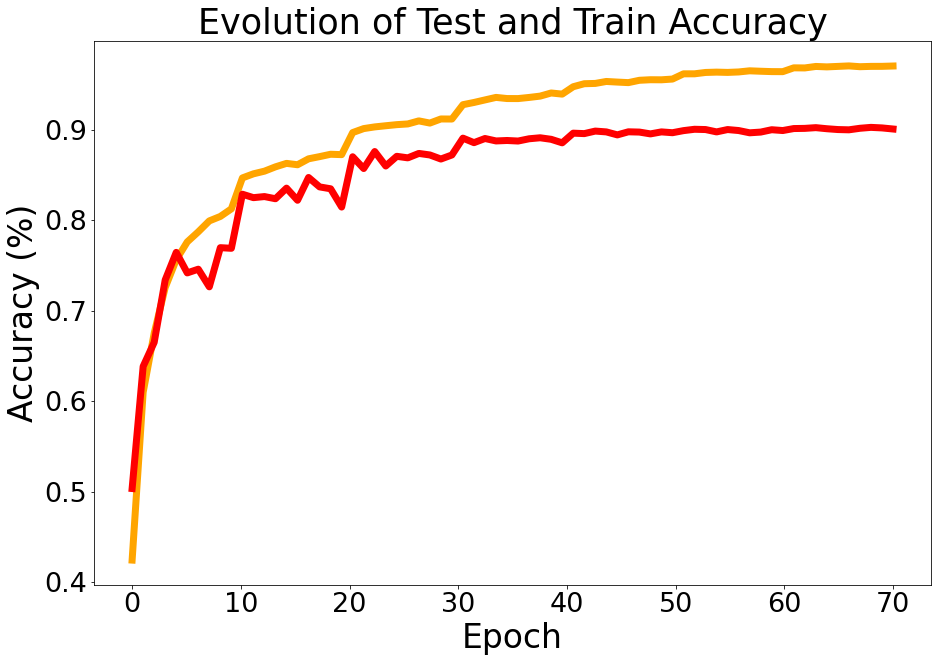

In [5]:
def get_test_and_train_acc(path):
    model = torch.load(path)
    #print(model.keys())
    test = []
    train = []
    for x in range(70):
        test.append(model['performance_statistics']['test_acc1_epoch_' + str(x)])
        train.append(model['performance_statistics']['train_acc1_epoch_' + str(x)])

    #Plotting
    title_size = 42
    x_label_size = 40
    y_label_size = 40
    x_tick_size = 35
    y_tick_size = 35

    plt.figure(figsize=(15, 10))
    #plt.set_size_inches(15,10)

    plt.plot(np.linspace(0, 70, 70), train, color = 'orange', linewidth = 7)
    plt.plot(np.linspace(0, 70, 70), test, color = 'red', linewidth = 7)
    plt.title('Evolution of Test and Train Accuracy', fontsize = title_size)
    plt.yticks(fontsize = y_tick_size)
    plt.xticks(fontsize = x_tick_size)
    plt.ylabel("Accuracy (%)", fontsize = y_label_size)
    plt.xlabel("Epoch", fontsize = x_label_size)
    plt.savefig('figures/Test_Acc_Graph.png', bbox_inches = 'tight')
    plt.show()

path = 'models/trial_0_network_NIN01110_initlr_0.006_weightdDecay_0.0001_dataset_CIFAR10_epoch_69.pth.tar'
get_test_and_train_acc(path)
